**Import Essentials**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df= pd.read_csv('Training Dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#save a copy
df_org=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [7]:
df['Gender'].mode()[0]

'Male'

In [8]:
df.duplicated().sum()

0

In [9]:
#for numeriacal imputagtion using mean or median
#for categorical imputation using mode

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Univariante Analysis**

In [13]:
loan_sta_count=df['Loan_Status'].value_counts(normalize=True)
loan_sta_count

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

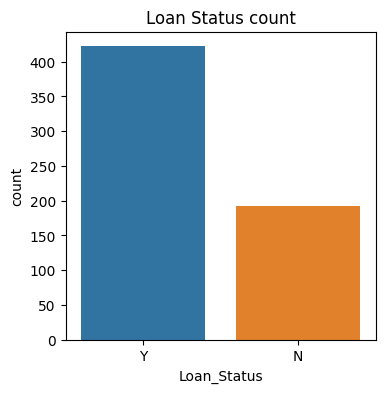

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Loan Status count')
sns.countplot(x=df['Loan_Status'], ax=ax)
plt.show()

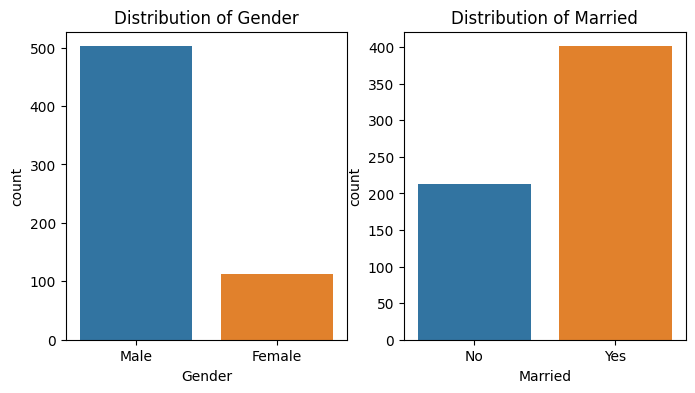

In [15]:
# catogorical variable count
plt.figure(figsize=(8,4))              #A count plot can be thought of as a histogram across a categorical, instead of quantitative variable.

plt.subplot(1,2,1)
sns.countplot(x=df['Gender'])
plt.title('Distribution of Gender')

plt.subplot(1,2,2)
sns.countplot(x=df['Married'])
plt.title('Distribution of Married')

plt.show()

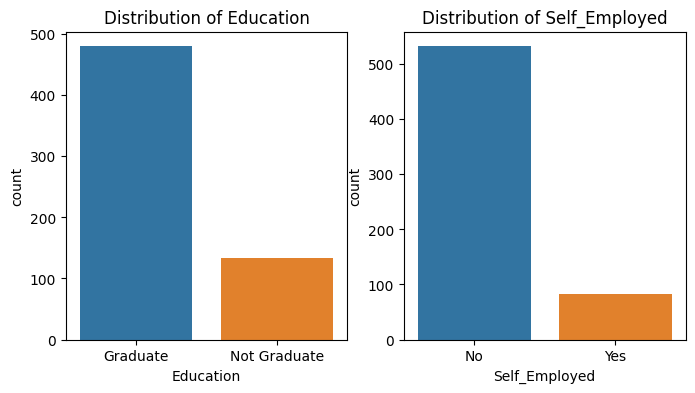

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(x=df['Education'])
plt.title('Distribution of Education')

plt.subplot(1,2,2)
sns.countplot(x=df['Self_Employed'])
plt.title('Distribution of Self_Employed')

plt.show()

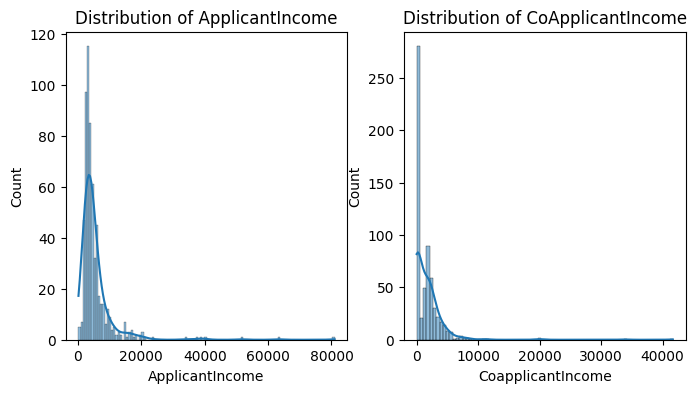

In [17]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Distribution of ApplicantIncome')

plt.subplot(1,2,2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Distribution of CoApplicantIncome')

plt.show()

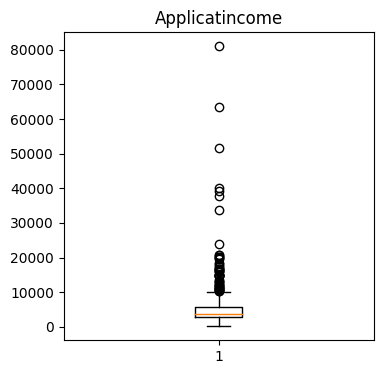

In [18]:
#checking the outliers
plt.figure(figsize=(4,4))
plt.title('Applicatincome')
plt.boxplot(df['ApplicantIncome'],vert=True)
plt.show();

Text(0.5, 0.98, '')

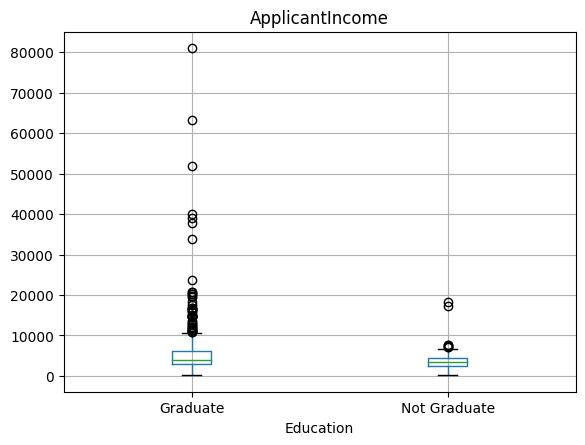

In [19]:
df.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

<ipython-input-20-d51ec304159a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount']);


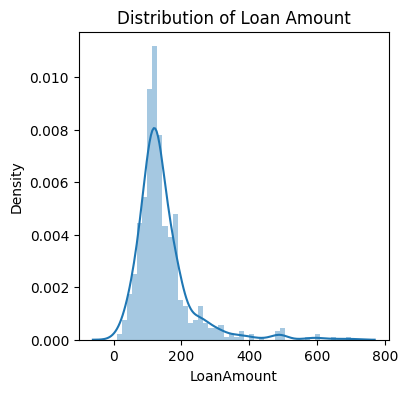

In [20]:
#distribution of loan amount
plt.figure(figsize=(4,4));
plt.title('Distribution of Loan Amount')
sns.distplot(df['LoanAmount']);
plt.show();

<Axes: >

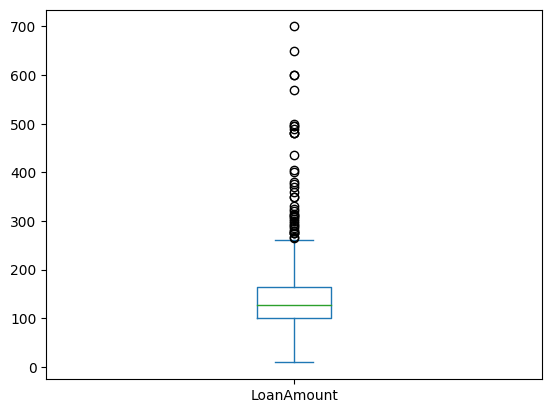

In [21]:
df['LoanAmount'].plot.box()

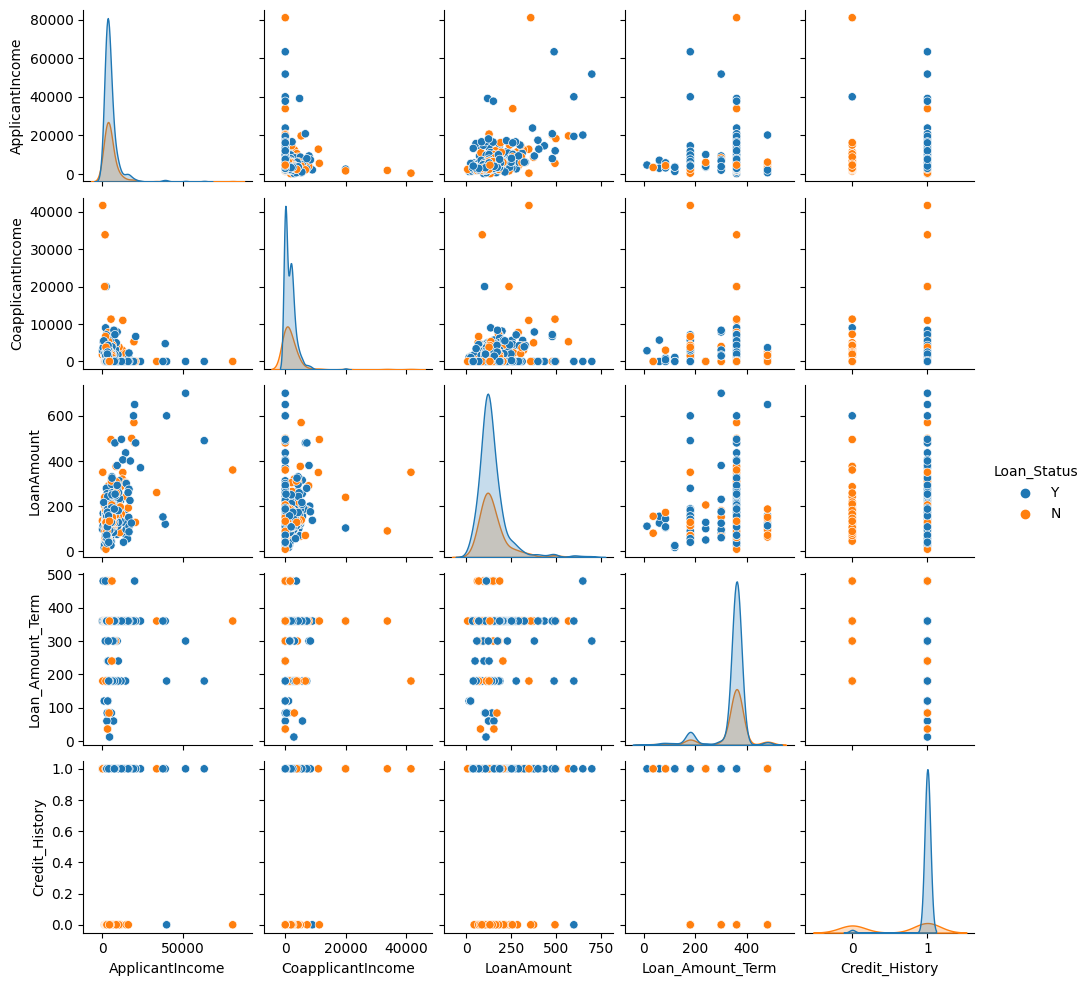

In [22]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde', height=2);

**Bivaraint Analysis**

In [23]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<Axes: xlabel='Gender'>

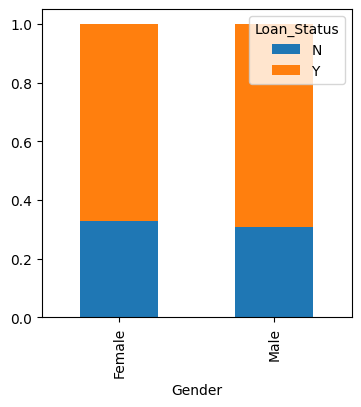

In [24]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',
                                                   stacked=True,figsize=(4,4))

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


<Axes: xlabel='Self_Employed'>

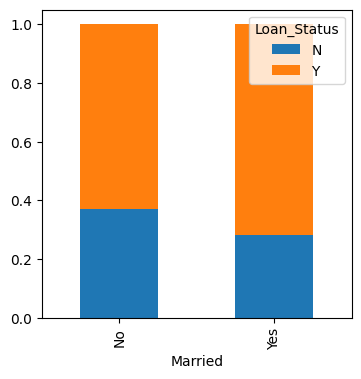

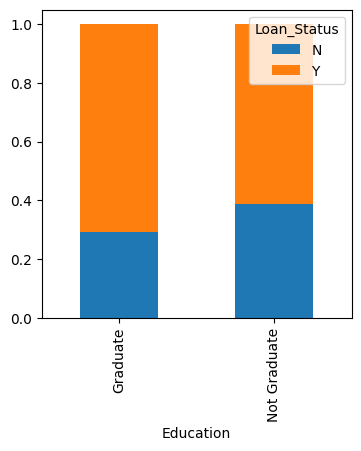

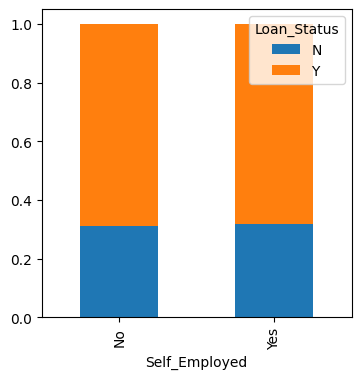

In [25]:
#married vs loan status
Married=pd.crosstab(df['Married'],df['Loan_Status'])
print(Married)
#education vs loan status
Education=pd.crosstab(df['Education'],df['Loan_Status'])
print(Education)
#eployment vs loan status
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
print(Self_Employed)


Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),
                                                    stacked=True)

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),
                                                         stacked=True)
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),
                                                                  stacked=True)

<Axes: xlabel='Property_Area'>

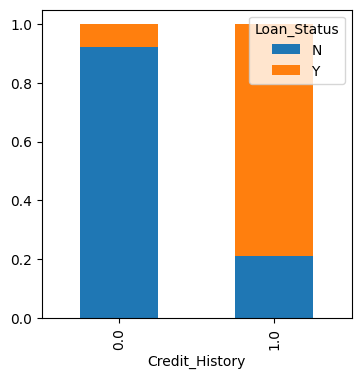

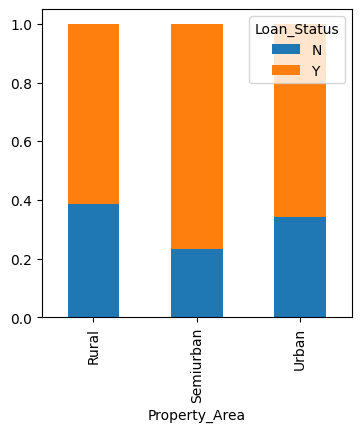

In [26]:
#credit history vs loan status  ;
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
#property vs loan status
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar'
                                                                   ,figsize=(4,4),stacked=True)
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4),stacked=True)

**Correlation**

In [27]:
matrix= df.corr()

<ipython-input-27-7c8f8a2b9063>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix= df.corr()


In [28]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<Axes: >

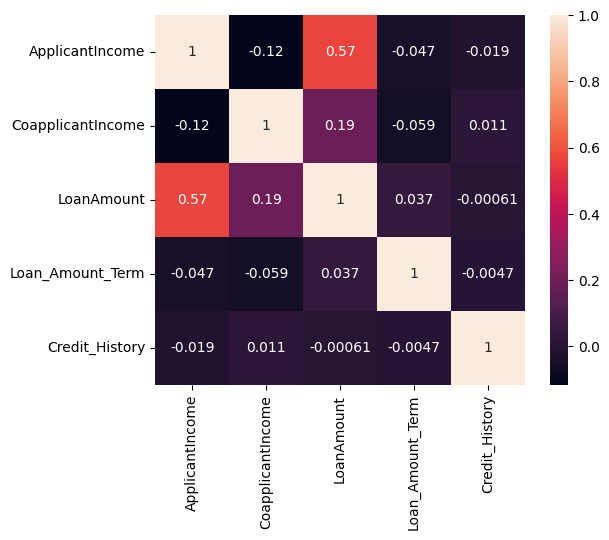

In [29]:
sns.heatmap(matrix,square=True,annot=True)

<Axes: >

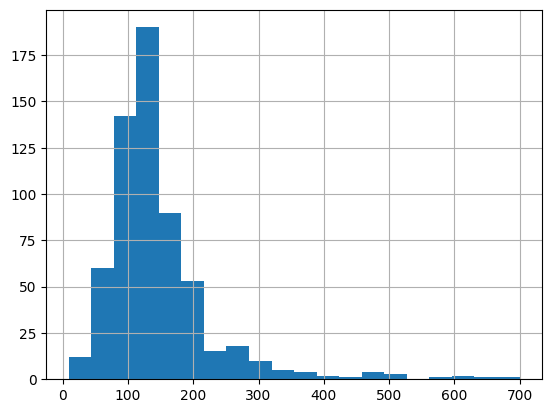

In [30]:
df['LoanAmount'].hist(bins=20)  #not for report

**Outliers Treatment**

<Axes: >

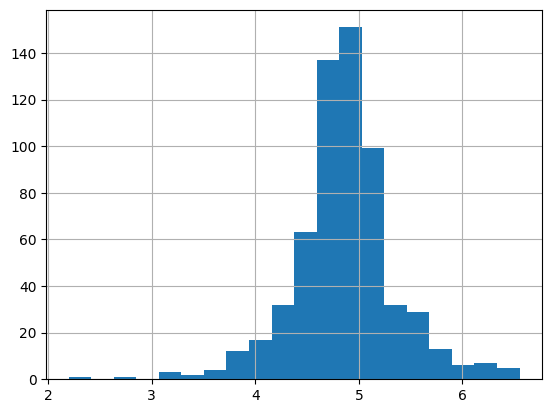

In [31]:
df['Loan_Amount_log']=np.log(df['LoanAmount'])
df['Loan_Amount_log'].hist(bins=20)

Model Building

In [32]:
df.drop('Loan_ID',axis=1,inplace=True)

<Axes: >

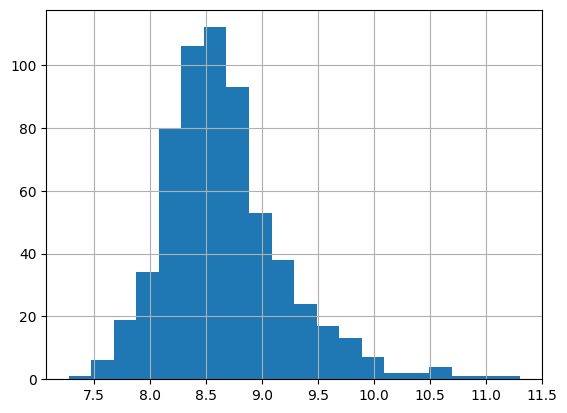

In [34]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['total_income_log']=np.log(df['Total_income'])  #log is used to normalize data into bell curve
df['total_income_log'].hist(bins=20)

In [35]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

**Encoding**

In [36]:
df= pd.get_dummies(df,drop_first=True)
df.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_log,Total_income,total_income_log,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,128.0,360.0,1.0,4.852030,5849.0,8.674026,1,0,0,0,0,0,0,0,1,1
1,128.0,360.0,1.0,4.852030,6091.0,8.714568,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,4.189655,3000.0,8.006368,1,1,0,0,0,0,1,0,1,1
3,120.0,360.0,1.0,4.787492,4941.0,8.505323,1,1,0,0,0,1,0,0,1,1
4,141.0,360.0,1.0,4.948760,6000.0,8.699515,1,0,0,0,0,0,0,0,1,1


In [37]:
X=df.iloc[:,0:-1]
y=df['Loan_Status_Y']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
train=scale.fit_transform(X_train)                #normaliza data only after train and test split to not encounter data leakage
test= scale.transform(X_test)                     #normalization is used on non-guassian or non-normal distribution data and
                                                  #Standardizationis useful when the feature distribution is Normal or Gaussian.


  **Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
model.fit(train,y_train)

LogisticRegression()

In [41]:
y_train_pred=model.predict(train)
y_test_pred_lr=model.predict(test)

In [42]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
train_acc

0.8018648018648019

In [43]:
test_acc=accuracy_score(y_test,y_test_pred_lr)
test_acc

0.827027027027027

In [44]:
#accuracy after cross validation
scores_lr=cross_val_score(model,X,y,cv=5)
score = []
score.append(scores_lr.mean());
print('The accuration of classification is %.2f%%' %(scores_lr.mean()*100))

The accuration of classification is 79.64%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=17)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [46]:
y_train_pred=Knn.predict(X_train)
y_test_pred_knn=Knn.predict(X_test)

In [47]:
y_train_acc=accuracy_score(y_train,y_train_pred)
y_train_acc

0.6993006993006993

In [48]:
y_test_acc=accuracy_score(y_test,y_test_pred_knn)
y_test_acc

0.654054054054054

In [49]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
scores_knn=cross_val_score(Knn,X,y,cv=50)
score.append(scores_knn.mean())
print('The accuration of classification is %.2f%%' %(scores_knn.mean()*100))

The accuration of classification is 61.44%


**Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_depth=5)                     #when max depth none its overfitting
d_tree.fit(X_train,y_train)
y_train_pred=d_tree.predict(X_train)
y_test_pred_dt=d_tree.predict(X_test)

In [51]:
y_train_acc=accuracy_score(y_train,y_train_pred)
print(y_train_acc)
y_test_acc=accuracy_score(y_test,y_test_pred_dt)
print(y_test_acc)

0.8344988344988346
0.7945945945945946


In [52]:
scores_dt=cross_val_score(d_tree,X,y,cv=5)
score.append(scores_dt.mean())
print('The accuration of classification is %.2f%%' %(scores_dt.mean()*100))

The accuration of classification is 79.32%


**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier
R_Forest=RandomForestClassifier(max_depth=6)
R_Forest.fit(X_train,y_train)
y_train_pred_r=R_Forest.predict(X_train)
y_test_pred_rf=R_Forest.predict(X_test)

In [54]:
train_acc=accuracy_score(y_train,y_train_pred_r)
print(train_acc)
test_acc=accuracy_score(y_test,y_test_pred_rf)
print(test_acc)

0.8461538461538461
0.8108108108108109


In [55]:
scores_rf=cross_val_score(R_Forest,X,y,cv=5)
score.append(scores_rf.mean())
print('The accuration of classification is %.2f%%' %(scores_rf.mean()*100))

The accuration of classification is 80.13%


**SVM**

In [56]:
from sklearn.svm import SVC
svc=SVC(max_iter=2)
svc.fit(X_train,y_train)
svc_train_pred=svc.predict(X_train)
svc_test_pred_svm=svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [57]:
train_acc=accuracy_score(y_train,svc_train_pred)
print(train_acc)
test_acc=accuracy_score(y_test,svc_test_pred_svm)
print(test_acc)

0.655011655011655
0.6756756756756757


In [58]:
scores_svm=cross_val_score(svc,X,y,cv=5)
score.append(scores_svm.mean())
print('The accuration of classification is %.2f%%' %(scores_svm.mean()*100))

The accuration of classification is 52.62%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing

**Evaluation**

In [59]:
from sklearn import metrics

In [60]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_test_pred_lr)

In [61]:
cm_display_lr = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False, True])

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

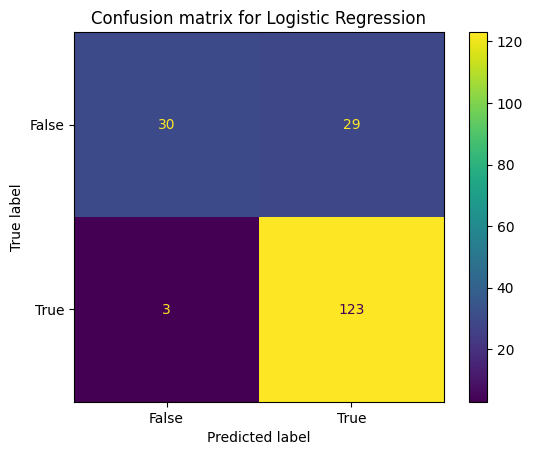

In [62]:
cm_display_lr.plot()
cm_display_lr.ax_.set_title('Confusion matrix for Logistic Regression')

In [63]:
print("Evaualtion for LogisticRegression")
print('Cross Validation {:.2f}'.format((scores_lr.mean())))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred_lr))
print('Precision: %.3f' % precision_score(y_test, y_test_pred_lr))
print('Recall: %.3f' % recall_score(y_test, y_test_pred_lr))
print('f1_score: %.3f' % f1_score(y_test, y_test_pred_lr))

Evaualtion for LogisticRegression
Cross Validation 0.80
Accuracy: 0.827
Precision: 0.809
Recall: 0.976
f1_score: 0.885


In [64]:
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_test_pred_knn)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = [False, True])

Text(0.5, 1.0, 'Confusion matrix for KNN')

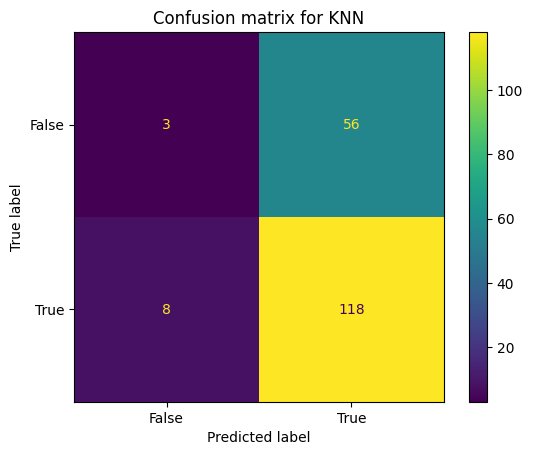

In [65]:
cm_display_knn.plot()
cm_display_knn.ax_.set_title('Confusion matrix for KNN')

In [66]:
print("Evaualtion for KNN")
print('Cross Validation {:.2f}'.format((scores_knn.mean())))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred_knn))
print('Precision: %.3f' % precision_score(y_test, y_test_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_test_pred_knn))
print('f1_score: %.3f' % f1_score(y_test, y_test_pred_knn))

Evaualtion for KNN
Cross Validation 0.61
Accuracy: 0.654
Precision: 0.678
Recall: 0.937
f1_score: 0.787


In [67]:
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_test_pred_dt)
cm_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [False, True])

Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

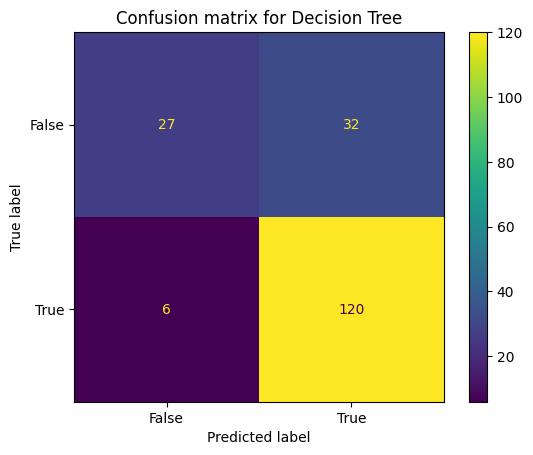

In [68]:
cm_display_dt.plot()
cm_display_dt.ax_.set_title('Confusion matrix for Decision Tree')

In [69]:
print("Evaualtion for Decision Tree")
print('Cross Validation {:.2f}'.format((scores_dt.mean())))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred_dt))
print('Precision: %.3f' % precision_score(y_test, y_test_pred_dt))
print('Recall: %.3f' % recall_score(y_test, y_test_pred_dt))
print('f1_score: %.3f' % f1_score(y_test, y_test_pred_dt))

Evaualtion for Decision Tree
Cross Validation 0.79
Accuracy: 0.795
Precision: 0.789
Recall: 0.952
f1_score: 0.863


In [70]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_test_pred_rf)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])

Text(0.5, 1.0, 'Confusion matrix for Random Forest')

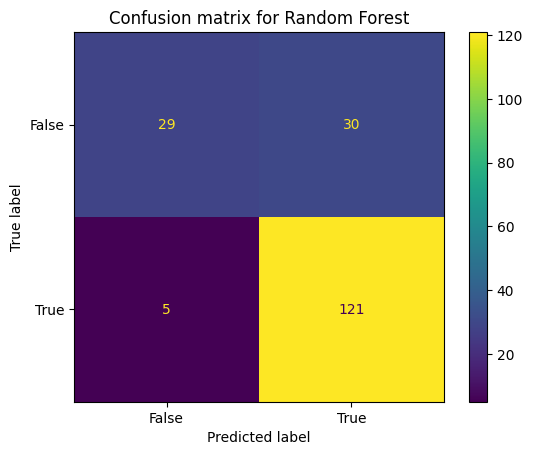

In [71]:
cm_display_rf.plot()
cm_display_rf.ax_.set_title('Confusion matrix for Random Forest')

In [72]:
print("Evaualtion for Random Forest")
print('Cross Validation {:.2f}'.format((scores_rf.mean())))
print('Accuracy: %.3f' % accuracy_score(y_test, y_test_pred_rf))
print('Precision: %.3f' % precision_score(y_test, y_test_pred_rf))
print('Recall: %.3f' % recall_score(y_test, y_test_pred_rf))
print('f1_score: %.3f' % f1_score(y_test, y_test_pred_rf))

Evaualtion for Random Forest
Cross Validation 0.80
Accuracy: 0.811
Precision: 0.801
Recall: 0.960
f1_score: 0.874


In [73]:
confusion_matrix_svm = metrics.confusion_matrix(y_test, svc_test_pred_svm)
cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = [False, True])

Text(0.5, 1.0, 'Confusion matrix for SVM')

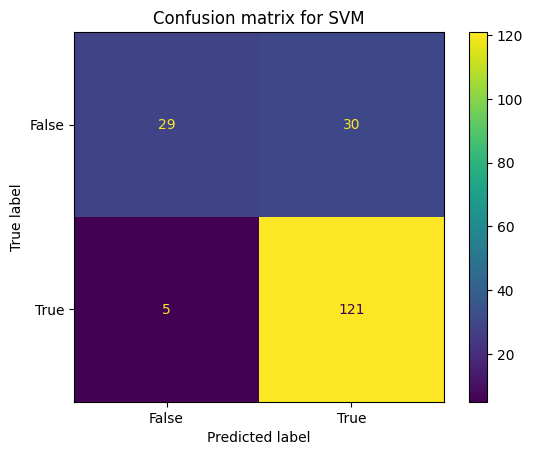

In [74]:
cm_display_rf.plot()
cm_display_rf.ax_.set_title('Confusion matrix for SVM')

In [75]:
print("Evaualtion for SVM")
print('Cross Validation {:.2f}'.format((scores_svm.mean())))
print('Accuracy: %.3f' % accuracy_score(y_test, svc_test_pred_svm))
print('Precision: %.3f' % precision_score(y_test, svc_test_pred_svm))
print('Recall: %.3f' % recall_score(y_test, svc_test_pred_svm))
print('f1_score: %.3f' % f1_score(y_test, svc_test_pred_svm))

Evaualtion for SVM
Cross Validation 0.53
Accuracy: 0.676
Precision: 0.699
Recall: 0.921
f1_score: 0.795
